# Project data exploration II -
## plotting categorical plot and incorporating other data

---


We will continue to work with the dataset that your group is consider for the term project. In this notebook we will create some plot using the Seaborn module and the different categorical plots we practiced in class. Additionally, we will explore the idea of working with other datasets in addition to the one you originally selected to strengthen your argument.

Group name: Group 4  
Created by Hardeep Kainth (016180424), Lohit Kishore (01698400), Hruday Prathipati (015830906), Jimmy Valdez (017352270)   
Last updated: 10/9/25   

### Q1: How clean is your data?  
Do you have formatting concerns, null values, inconsistent data, etc... If so, explain what cleaning or reformating you have to do and how you plan to approach this cleaning steps.

In [ ]:
import numpy as np
import pandas as pd
import warnings; warnings.filterwarnings("ignore")


# plotly library
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

# matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/nba-player-stats-2021.csv')

Mounted at /content/drive


In [ ]:
df.isnull().sum()

,0
player,0
pos,0
age,0
tm,0
g,0
gs,0
mp,0
fg,0
fga,0
fgpercent,15


In [ ]:
df.dtypes

,0
player,object
pos,object
age,int64
tm,object
g,int64
gs,int64
mp,int64
fg,float64
fga,float64
fgpercent,float64


Based on the data types and the number of null data points, the data looks properly cleaned. The null points represent statistics that literally don't exist for the player, which therefore cannot be filled and is appropriately labelled

### Q2: Create a categorical plot
Come up with a unique question that can be answer using a categorical plot from the sns module

What is the PPG distribution for the players on each team?

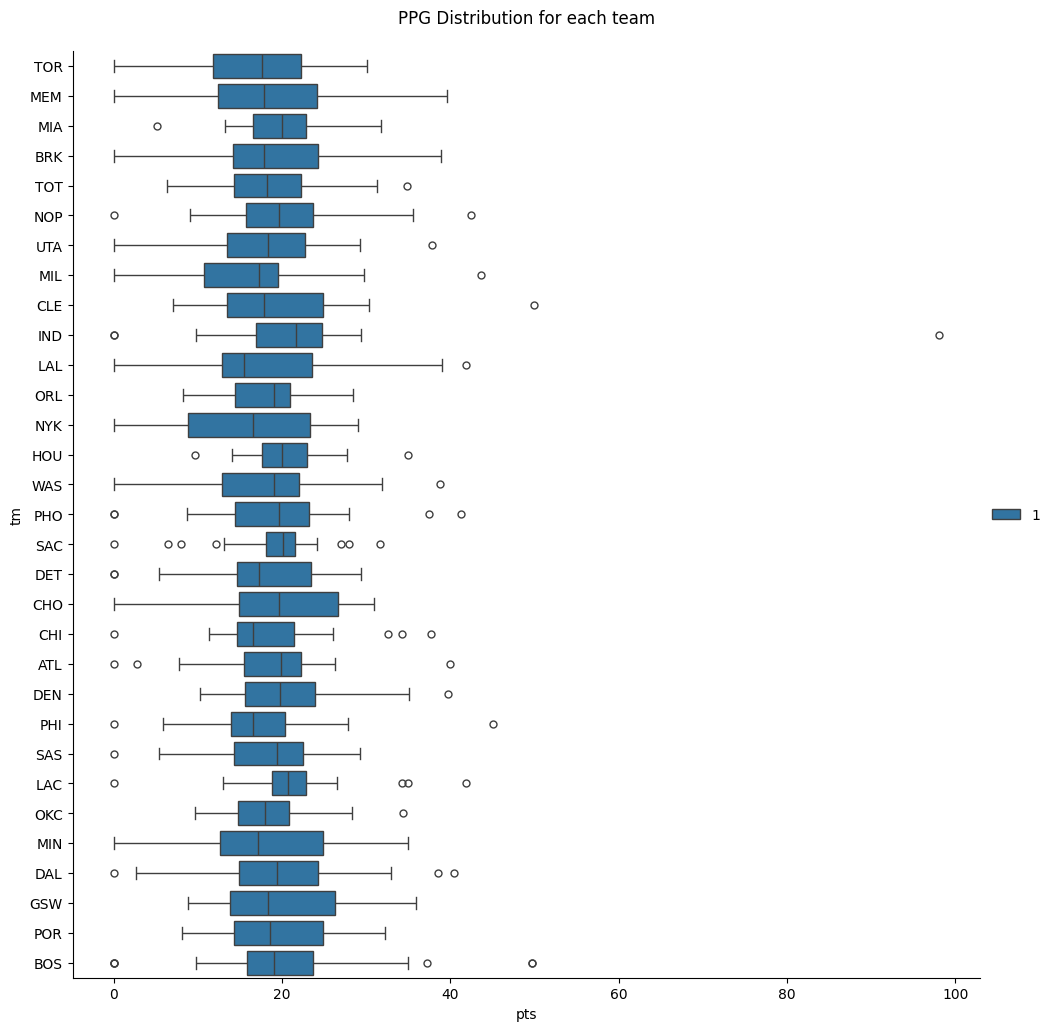

In [ ]:
# Your code here . . .
sns.catplot(data=df,
            x="pts",
            y="tm",
            kind="box",
            height=10,
            hue=1)

plt.title("PPG Distribution for each team", pad=20);

### Q3: Come up with a another unique question. This question must use map() or apply()

Which players have a greater than average, or less than average PPG?

In [ ]:
# Your code here . . .
average_ppg = df["pts"].mean()
average_ppg

def greater_than_average(ppg):
    if (ppg >= average_ppg):
      return "GTA"
    else:
      return "LTA"

df["is_avg_points"] = df["pts"].apply(greater_than_average)
df.head()

,player,pos,age,tm,g,gs,mp,fg,fga,fgpercent,...,trb,ast,stl,blk,tov,pf,pts,ortg,drtg,is_avg_points
0,Precious Achiuwa,C,22,TOR,73,28,1725,7.7,17.5,0.439,...,13.7,2.4,1.1,1.2,2.4,4.4,19.2,105.0,110,GTA
1,Steven Adams,C,28,MEM,76,75,1999,5.0,9.2,0.547,...,18.2,6.1,1.6,1.4,2.8,3.7,12.6,125.0,108,LTA
2,Bam Adebayo,C,24,MIA,56,56,1825,11.1,20.0,0.557,...,15.5,5.2,2.2,1.2,4.1,4.7,29.3,117.0,104,GTA
3,Santi Aldama,PF,21,MEM,32,0,360,7.0,17.5,0.402,...,11.6,2.8,0.8,1.3,2.1,4.8,17.5,101.0,111,LTA
4,LaMarcus Aldridge,C,36,BRK,47,12,1050,11.6,21.1,0.550,...,11.9,1.9,0.6,2.2,2.0,3.6,28.0,119.0,112,GTA


### Q4: Create an interactive plot
Create an interactive plot using plotly. Your plot can be a previously asked question or a new question, however explain how this interaction strengthen what you want to communicate with your audience.

What is the PPG for players on the Lakers?

In [ ]:
# If running plotly in Google colab, you will need to run this custom initalization function
# in each offline plotting cell
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
# Your code here . . .
configure_plotly_browser_state()
# df2016 = df2016.sort_values(by="citations", ascending=False)
px.bar(df[df["tm"] == "LAL"], x="player", y="pts", hover_data="pos")

## Q5: Additional datasets and data processing
For the questions below you do not need to do the plotting if you have not found another complementary dataset. However, write the psuedocode of how you could go about answering the questions and sketches of what your visualization might be. Answer the following:

What additional datasets would you need to find or create to help strengthen your data?
How would you combine the dataset?
Do you need to reshape your data and how could you go about it?

Additional datasets I might look for that could strengthen my data are data about the betting odds for players to score x number of points, assists, steals, or blocks in a given game, and to what the numbers were. This could help strengthen my data because it could give the probabilities for each statistic, and whether or not a statistic ends up happening more often than another to lead to the biggest potential profit to the user. I would combine the datasets by adding the ast, stl, bkl, and pts columns to the betting odds so that I can potentially make a model where given certain statistics, what would the odds be and if it were likely or not to achieve it.